# Johnson-Cook with 6 strain rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("mime")
import pandas as pd
import h5py
from scipy.optimize import curve_fit

colors = ['#bb0000', '#00bb00', "#0000bb", '#bbbb00', '#bb00bb', "#00bbbb", '#bbbbbb', '#770000', '#007700', "#000077", '#777700', '#770077', "#007777", '#777777', '#440000', '#004400', "#000044", '#444400', '#440044', "#0044444", '#444444','#000000']

In [2]:
baseSize = (8, 6)  # Base size of a subplot

def sbPlot(n):
    if (n == 1): return 1, 1
    if (n <= 2): return 1, 2
    if (n <= 4): return 2, 2
    if (n <= 6): return 3, 2
    if (n <= 9): return 3, 3
    if (n <= 12): return 4, 3
    return 0, 0

def sbPlotSize(n):
    x, y = sbPlot(n)
    return baseSize[0] * y, baseSize[1] * x

In [3]:
h5f = h5py.File('../GleebleData.h5','r')
allData = h5f['all'][:]
shortData = h5f['short'][:]
h5f.close()

In [4]:
allData.shape, shortData.shape

((21030, 4), (1080, 4))

Remove first point of each curve, where $\varepsilon^p=0$

In [5]:
allData = allData[allData[:,0]!=0]
shortData = shortData[shortData[:,0]!=0]

In [6]:
strains = np.unique(shortData[:,0])
epsps = np.unique(shortData[:,1])
temperatures = np.unique(shortData[:,2])

In [7]:
nEps = len(strains)
nEpsp = len(epsps)
nTemp = len(temperatures)
strains, epsps, temperatures, nEps, nEpsp, nTemp

(array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
        0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
        0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
        0.68, 0.7 ]),
 array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00, 5.e+00]),
 array([1050., 1100., 1150., 1200., 1250.]),
 35,
 6,
 5)

# Identification of the Johnson-Cook parameters
$\sigma = (A + B\varepsilon^n)\left(1 + C\ln\left(\frac{\dot{\varepsilon^p}}{\dot{\varepsilon^p}}\right)\right)\left(1-\left(\frac{T-T_0}{T_m - T_0}\right)^m\right)$

In [8]:
T0 = temperatures[0]
epsp0 = epsps[0]
Tm = 1460

In [9]:
data2 = allData[(allData[:,0]<=0.002) & (allData[:,1]==epsp0) & (allData[:,2]==T0)]
print(data2)
A = data2[:,3].max()
print("A=%g" %(A))

[[1.000000e-03 1.000000e-03 1.050000e+03 1.351428e+01]
 [2.000000e-03 1.000000e-03 1.050000e+03 1.487954e+01]]
A=14.8795


In [10]:
Sig = shortData[(shortData[:,1]==epsp0) & (shortData[:,2]==T0)]
print(Sig)
params = np.polyfit(np.log(Sig[:,0]), np.log(Sig[:,3]-A), 1)
n, lnB = params
B = np.exp(lnB)
print("lnB=%g, B=%g, n=%g" %(lnB, B, n))

[[2.000000e-02 1.000000e-03 1.050000e+03 2.339898e+01]
 [4.000000e-02 1.000000e-03 1.050000e+03 2.753159e+01]
 [6.000000e-02 1.000000e-03 1.050000e+03 3.052672e+01]
 [8.000000e-02 1.000000e-03 1.050000e+03 3.276437e+01]
 [1.000000e-01 1.000000e-03 1.050000e+03 3.458296e+01]
 [1.200000e-01 1.000000e-03 1.050000e+03 3.586056e+01]
 [1.400000e-01 1.000000e-03 1.050000e+03 3.687867e+01]
 [1.600000e-01 1.000000e-03 1.050000e+03 3.754122e+01]
 [1.800000e-01 1.000000e-03 1.050000e+03 3.794106e+01]
 [2.000000e-01 1.000000e-03 1.050000e+03 3.777455e+01]
 [2.200000e-01 1.000000e-03 1.050000e+03 3.697794e+01]
 [2.400000e-01 1.000000e-03 1.050000e+03 3.641952e+01]
 [2.600000e-01 1.000000e-03 1.050000e+03 3.589037e+01]
 [2.800000e-01 1.000000e-03 1.050000e+03 3.541231e+01]
 [3.000000e-01 1.000000e-03 1.050000e+03 3.493334e+01]
 [3.200000e-01 1.000000e-03 1.050000e+03 3.474738e+01]
 [3.400000e-01 1.000000e-03 1.050000e+03 3.434205e+01]
 [3.600000e-01 1.000000e-03 1.050000e+03 3.389438e+01]
 [3.800000

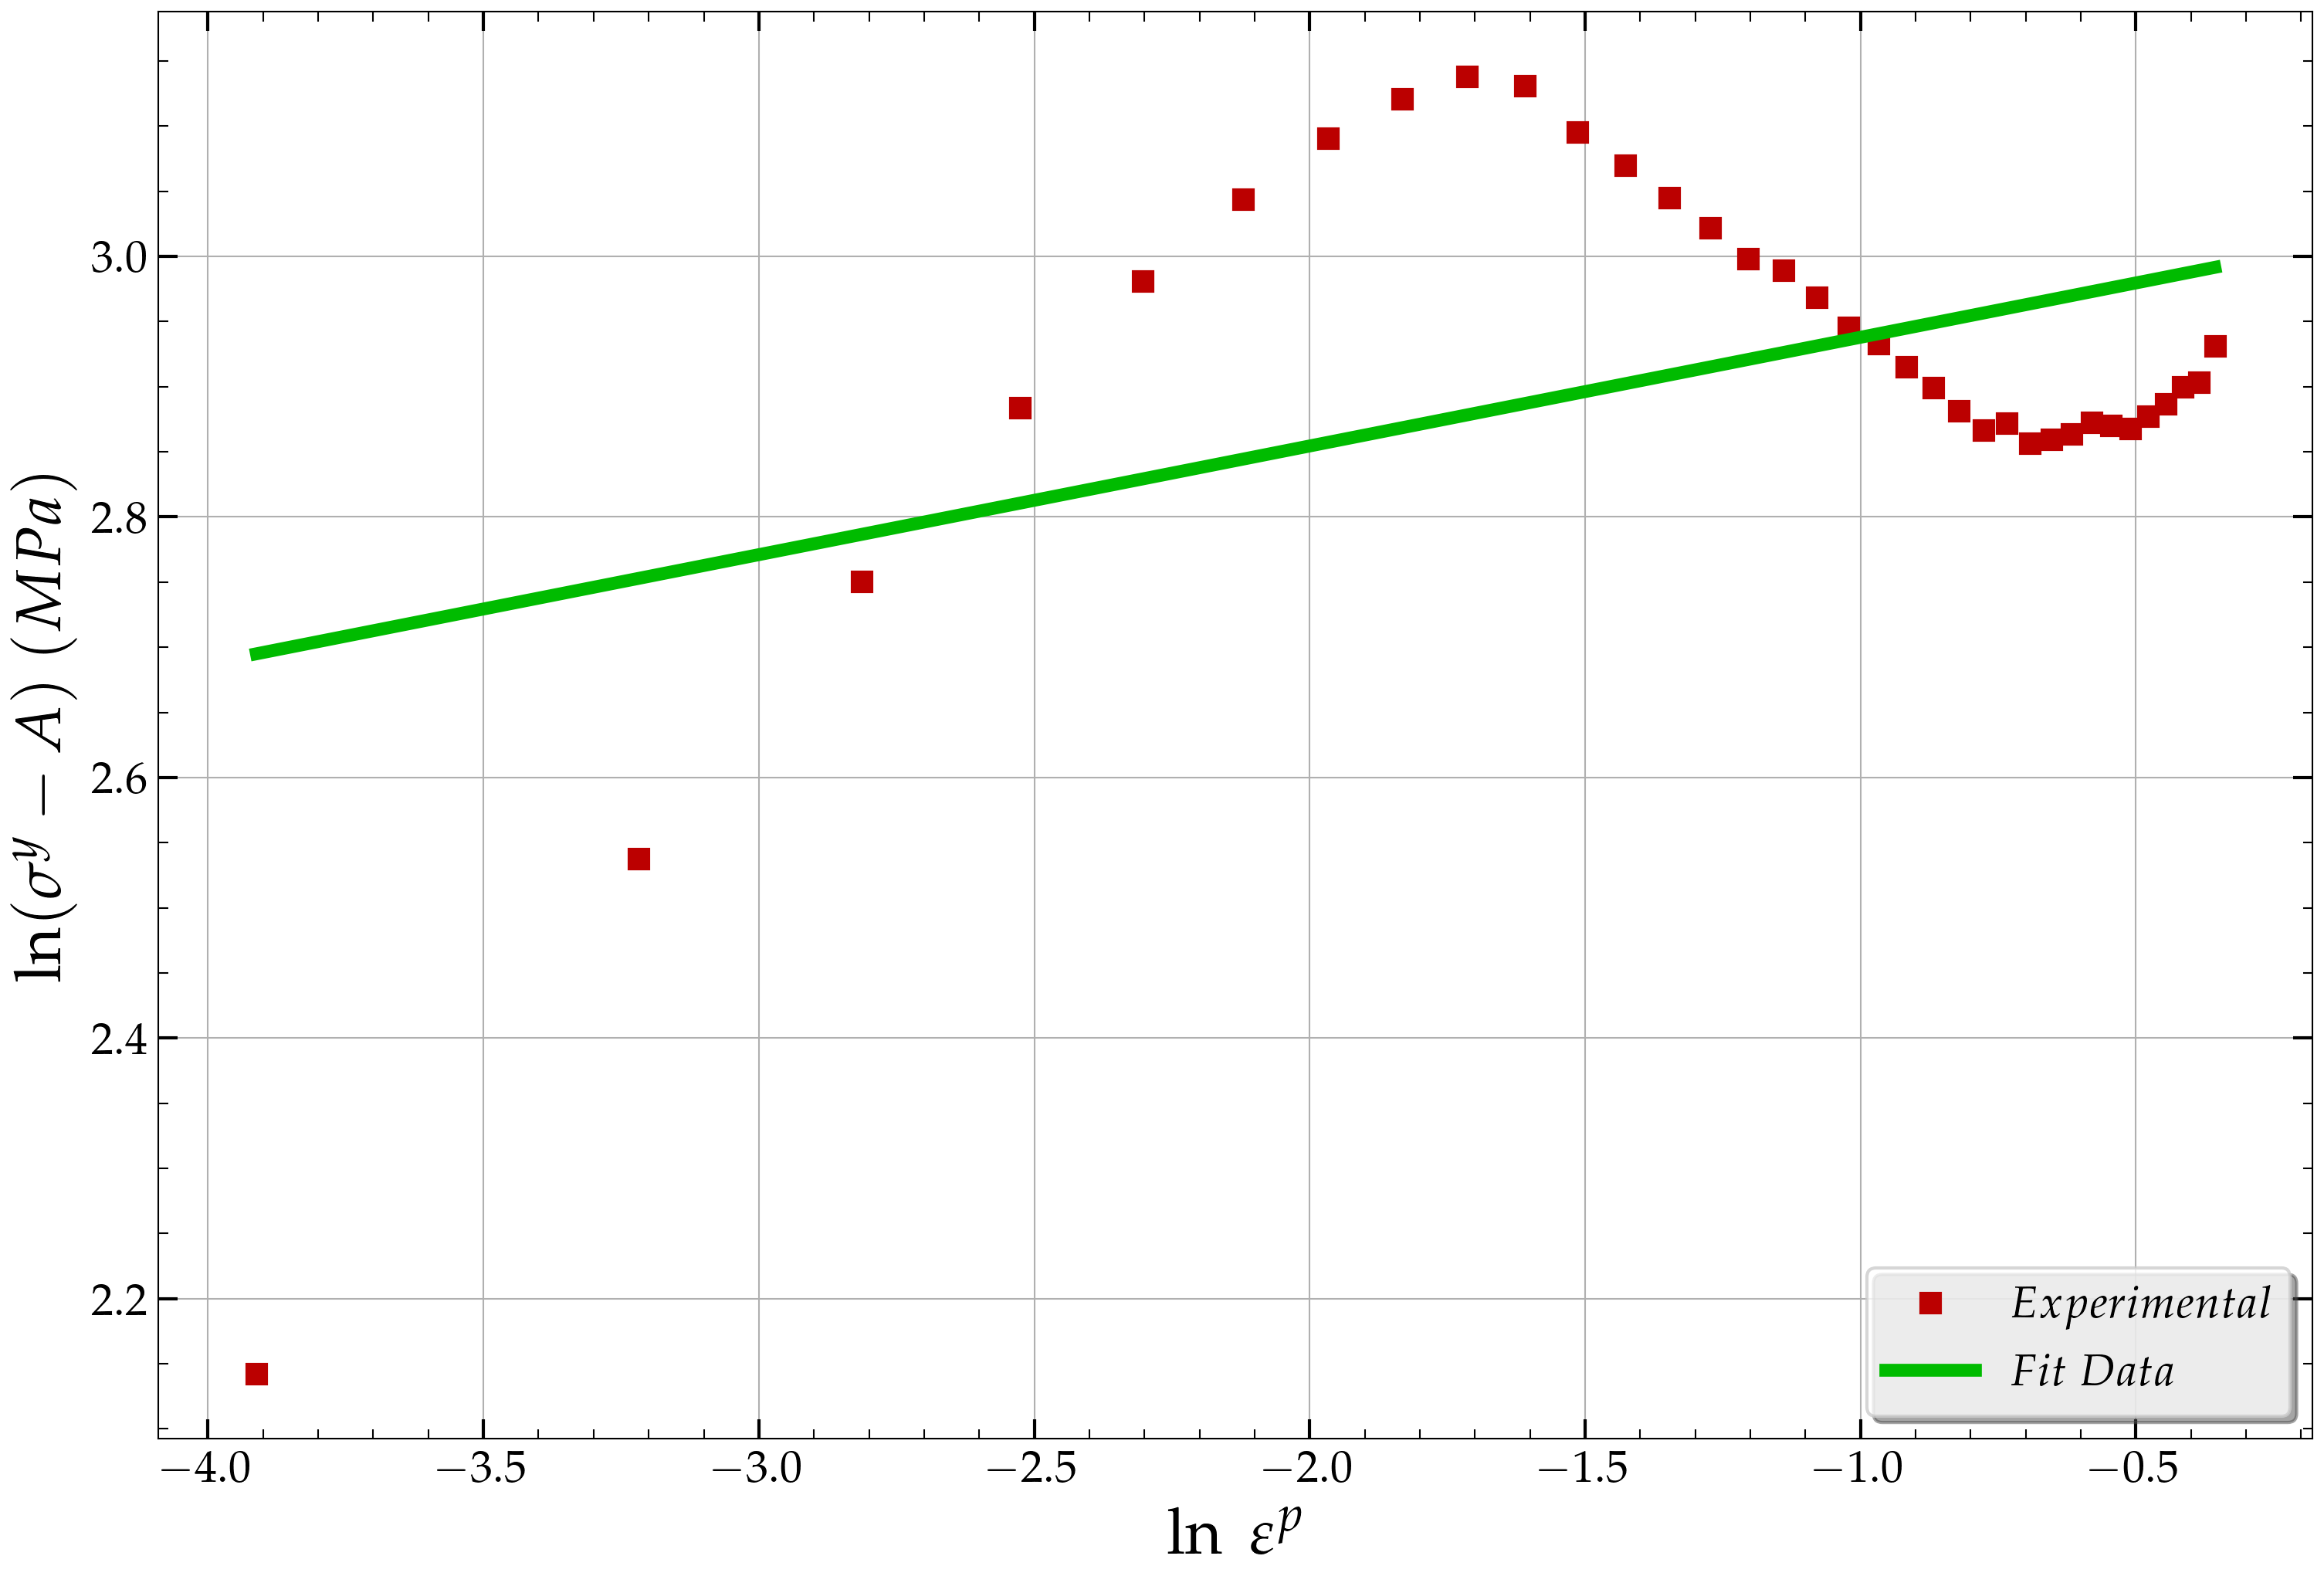

In [11]:
def LinearFunction(x, a, b):
    return a*x + b

plt.figure(figsize =(12,8))
plt.rc('text', usetex = True)
plt.plot(np.log(Sig[:,0]), np.log(Sig[:,3]-A), colors[0], label = r'$Experimental$', marker='s', linestyle='None')
plt.plot(np.log(Sig[:,0]), LinearFunction(np.log(Sig[:,0]), n, lnB), colors[1], label = r'$Fit\ Data$', lw=4)
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.xlabel(r'$\ln\ \varepsilon^p$', fontsize = 20)
plt.ylabel(r'$\ln (\sigma^y - A)\ (MPa)$', fontsize = 20)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.savefig('SigmaA-B.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show() 

In [12]:
sigT0 = shortData[shortData[:,2]==T0]
sigT0[:,3] = (sigT0[:,3])/(A + B*(sigT0[:,0])**n)
sigT0

array([[2.00000000e-02, 1.00000000e-03, 1.05000000e+03, 7.88249697e-01],
       [4.00000000e-02, 1.00000000e-03, 1.05000000e+03, 9.00722190e-01],
       [6.00000000e-02, 1.00000000e-03, 1.05000000e+03, 9.81382237e-01],
       [8.00000000e-02, 1.00000000e-03, 1.05000000e+03, 1.04013879e+00],
       [1.00000000e-01, 1.00000000e-03, 1.05000000e+03, 1.08709359e+00],
       [1.20000000e-01, 1.00000000e-03, 1.05000000e+03, 1.11813223e+00],
       [1.40000000e-01, 1.00000000e-03, 1.05000000e+03, 1.14195345e+00],
       [1.60000000e-01, 1.00000000e-03, 1.05000000e+03, 1.15548906e+00],
       [1.80000000e-01, 1.00000000e-03, 1.05000000e+03, 1.16157859e+00],
       [2.00000000e-01, 1.00000000e-03, 1.05000000e+03, 1.15094832e+00],
       [2.20000000e-01, 1.00000000e-03, 1.05000000e+03, 1.12178109e+00],
       [2.40000000e-01, 1.00000000e-03, 1.05000000e+03, 1.10044217e+00],
       [2.60000000e-01, 1.00000000e-03, 1.05000000e+03, 1.08046895e+00],
       [2.80000000e-01, 1.00000000e-03, 1.05000000e

C=0.351887


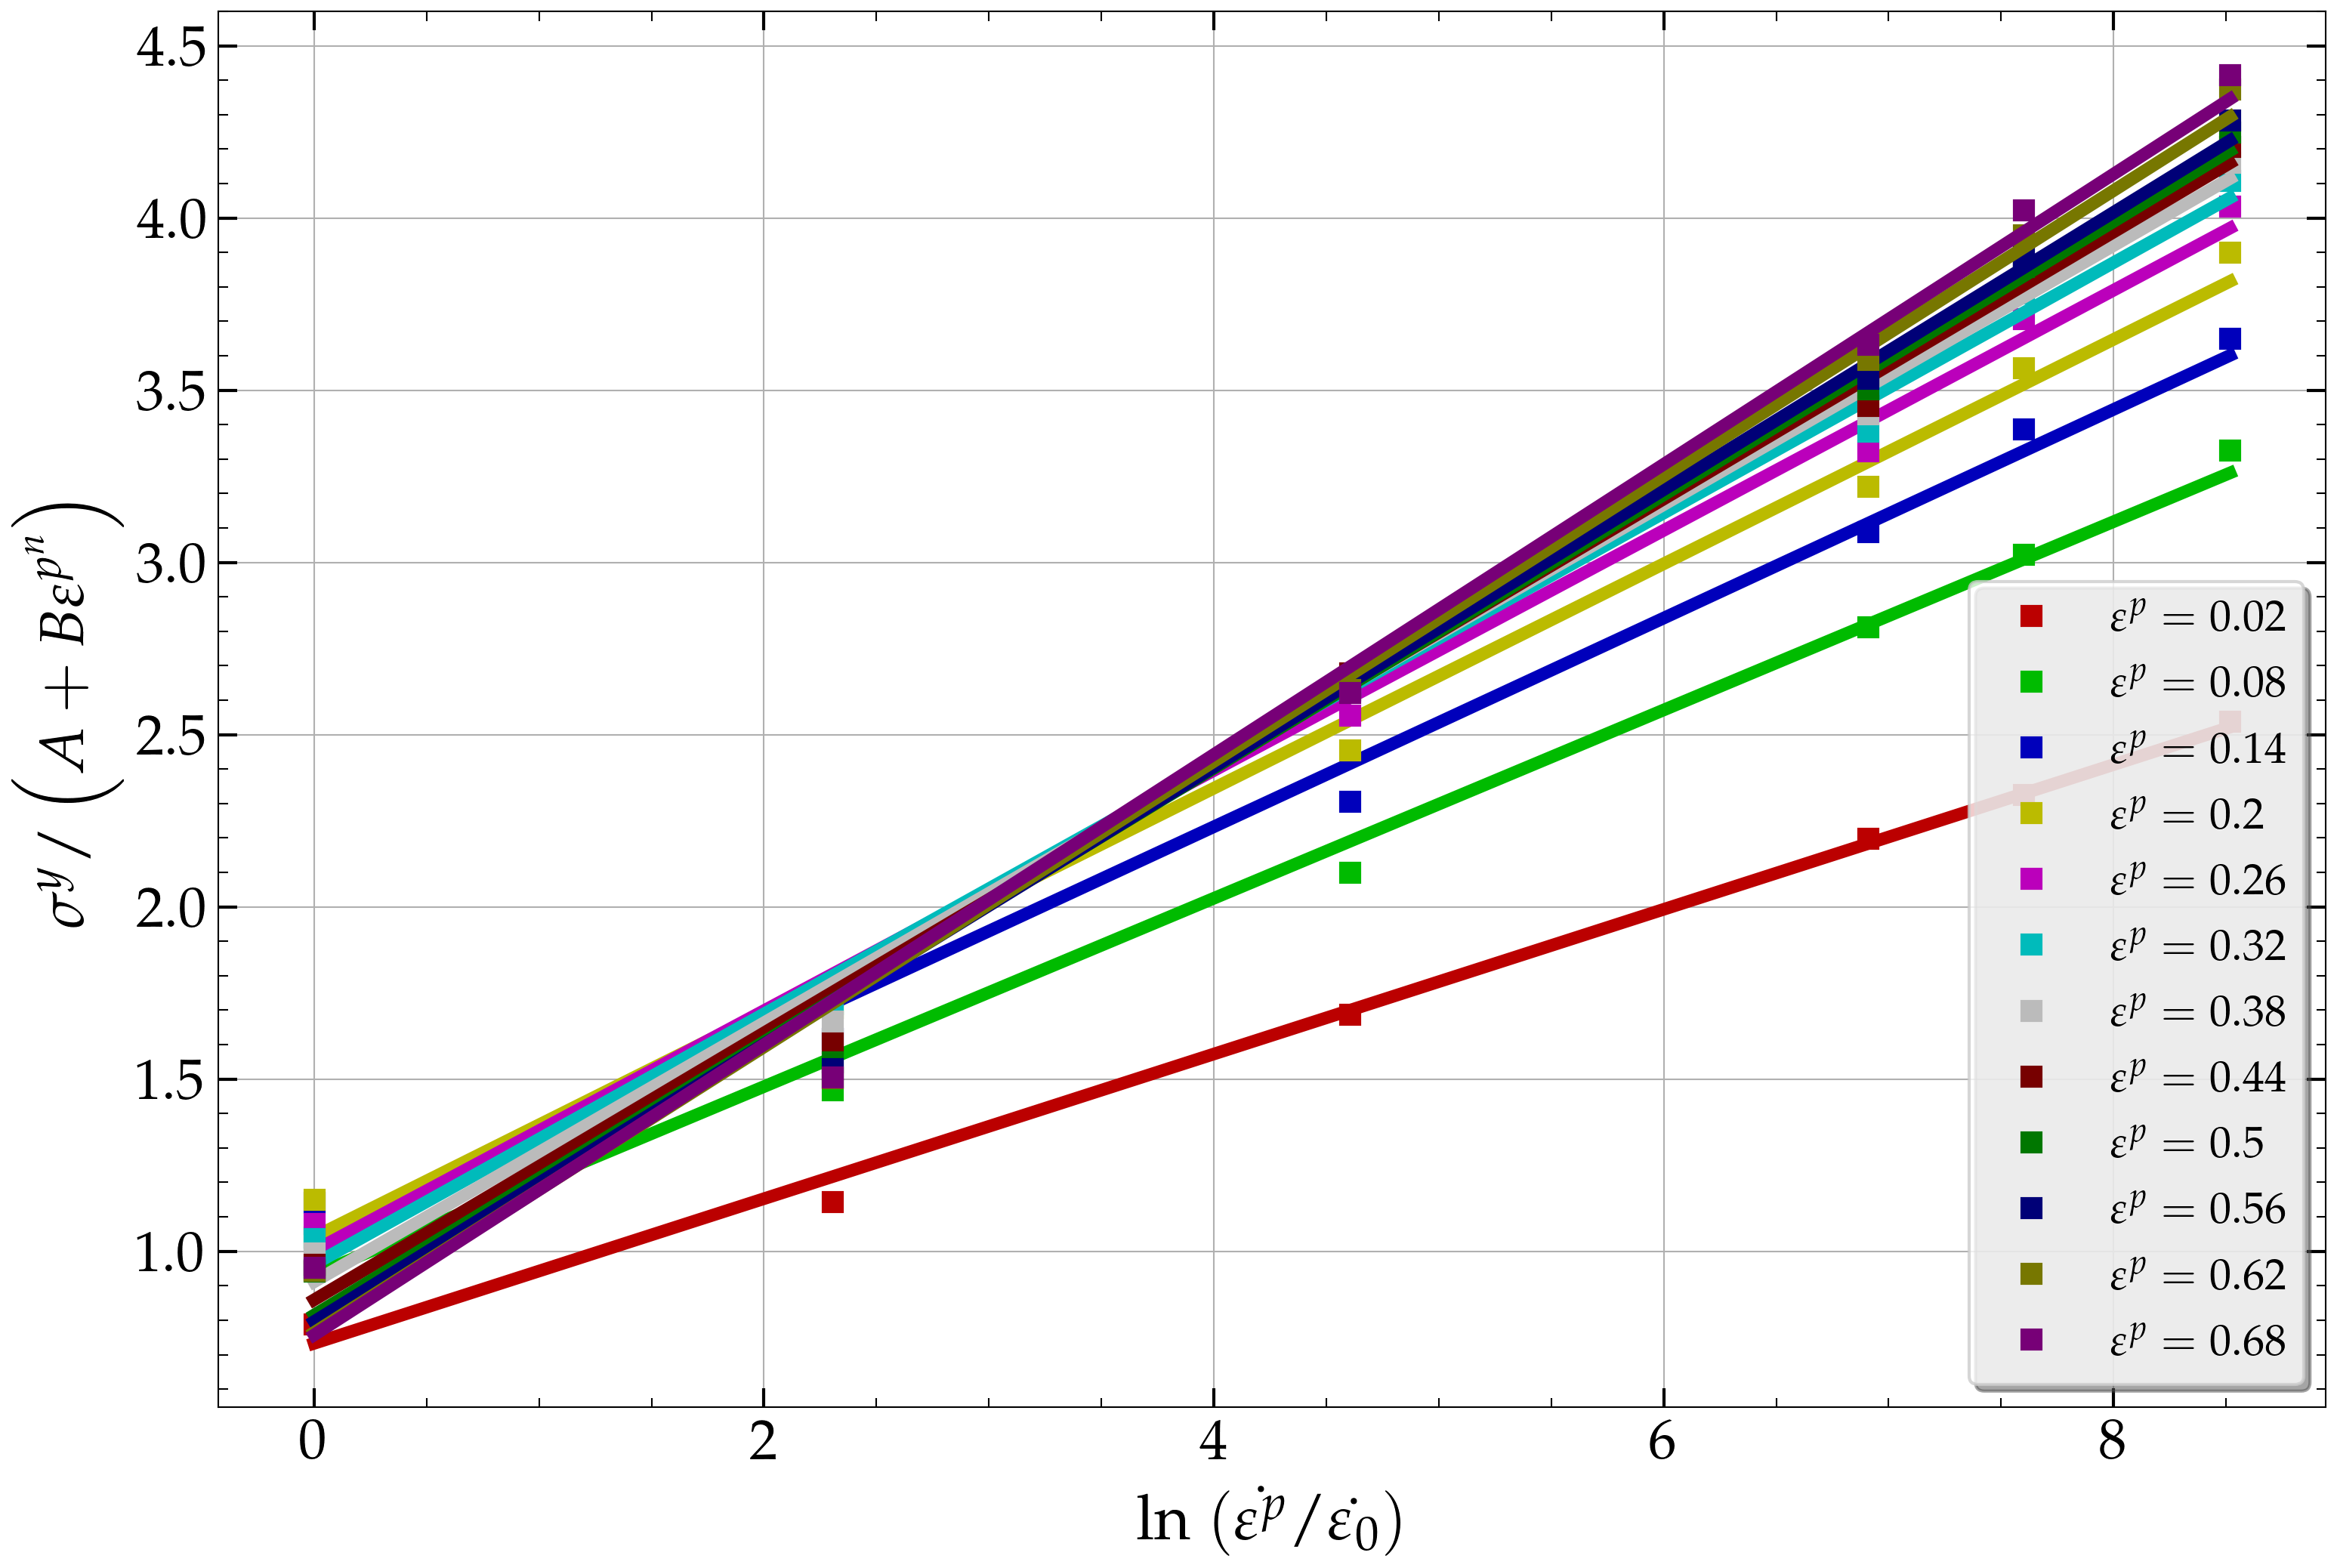

In [13]:
plt.figure(figsize =(12,8))
plt.rc('text', usetex = True)
I = []
S = []
cl=0
for epsj in list(strains[::3]):
    sbdata = sigT0[sigT0[:,0]==epsj]
    params = np.polyfit(np.log(sbdata[:,1]/epsp0), sbdata[:,3], 1)
    s,i = params
    I.append(i)
    S.append(s)
    plt.plot(np.log(sbdata[:,1]/epsp0), sbdata[:,3], colors[cl], label = r'$\varepsilon^p='+str(epsj)+ '$', marker='s', linestyle='None')
    plt.plot(np.log(sbdata[:,1]/epsp0), LinearFunction(np.log(sbdata[:,1]/epsp0), s, i), colors[cl], lw=4)
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
    plt.xlabel(r'$\ln\ (\dot{\varepsilon^{p}}/\dot{\varepsilon_0})$', fontsize = 20)
    plt.ylabel(r'$\sigma^y/\left(A + B\varepsilon^{p^n}\right)$', fontsize = 20)
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    cl +=1
C1 = np.mean(I)
C  = np.mean(S)
C, C1
print("C=%g" %(C))
plt.savefig('SigmaAB1.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show() 

C1=0.334742


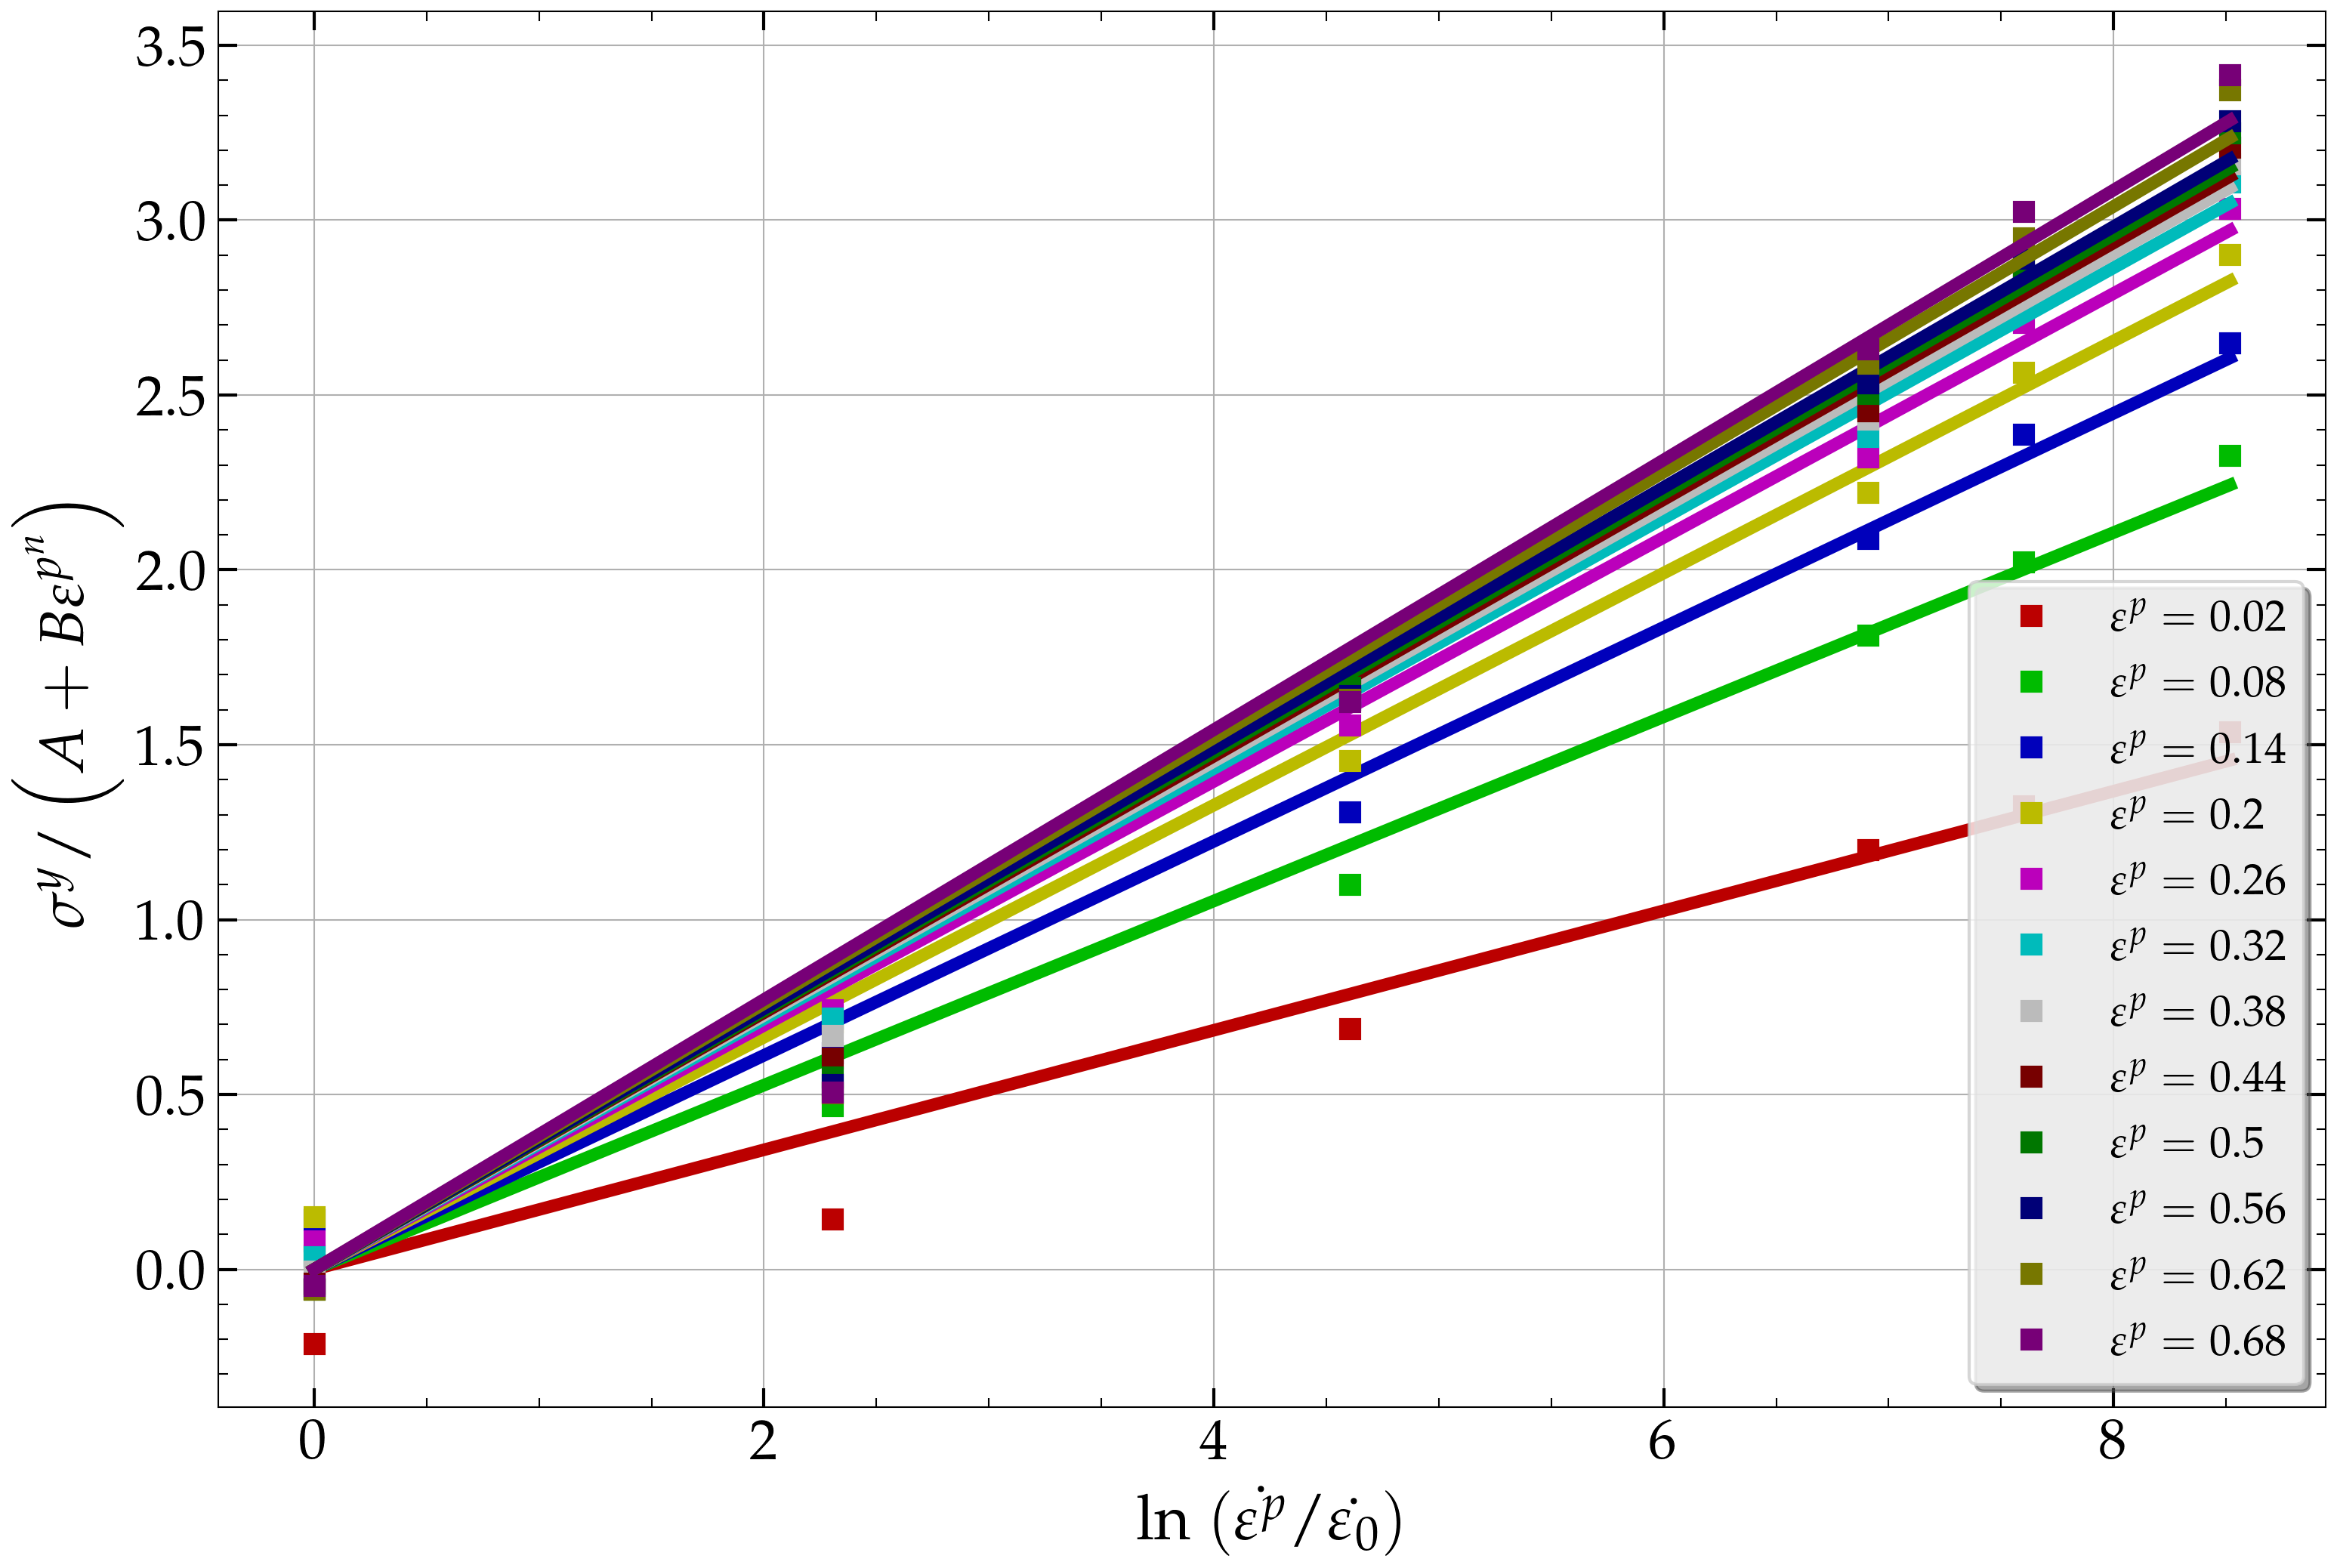

In [14]:
def specialFunction(x,s):
    return s*x

plt.figure(figsize =(12,8))
plt.rc('text', usetex = True)
S1 = []
cl=0
for epsj in list(strains[::3]):
    sbdata = sigT0[sigT0[:,0]==epsj]
    popt, pcov = curve_fit(specialFunction, np.log(sbdata[:,1]/epsp0), (sbdata[:,3]-1), bounds=(-np.inf, [np.inf]))
    s = popt
    S1.append(s)
    plt.plot(np.log(sbdata[:,1]/epsp0), (sbdata[:,3]-1), colors[cl], label = r'$\varepsilon^p='+str(epsj)+ '$', marker='s', linestyle='None')
    plt.plot(np.log(sbdata[:,1]/epsp0), specialFunction(np.log(sbdata[:,1]/epsp0), s), colors[cl], lw=4)
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
    plt.xlabel(r'$\ln\ (\dot{\varepsilon^{p}}/\dot{\varepsilon_0})$', fontsize = 20)
    plt.ylabel(r'$\sigma^y/\left(A + B\varepsilon^{p^n}\right)$', fontsize = 20)
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    cl +=1
C1  = np.mean(S1)
print("C1=%g" %(C1))
plt.savefig('SigmaAB2.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show() 

In [15]:
sigEpsp0 = shortData[(shortData[:,1]==epsp0) & (shortData[:,2]!=T0)]
sigEpsp0[:,3] = 1 - (sigEpsp0[:,3]/((A + B*(sigEpsp0[:,0])**n)))

m=0.698858


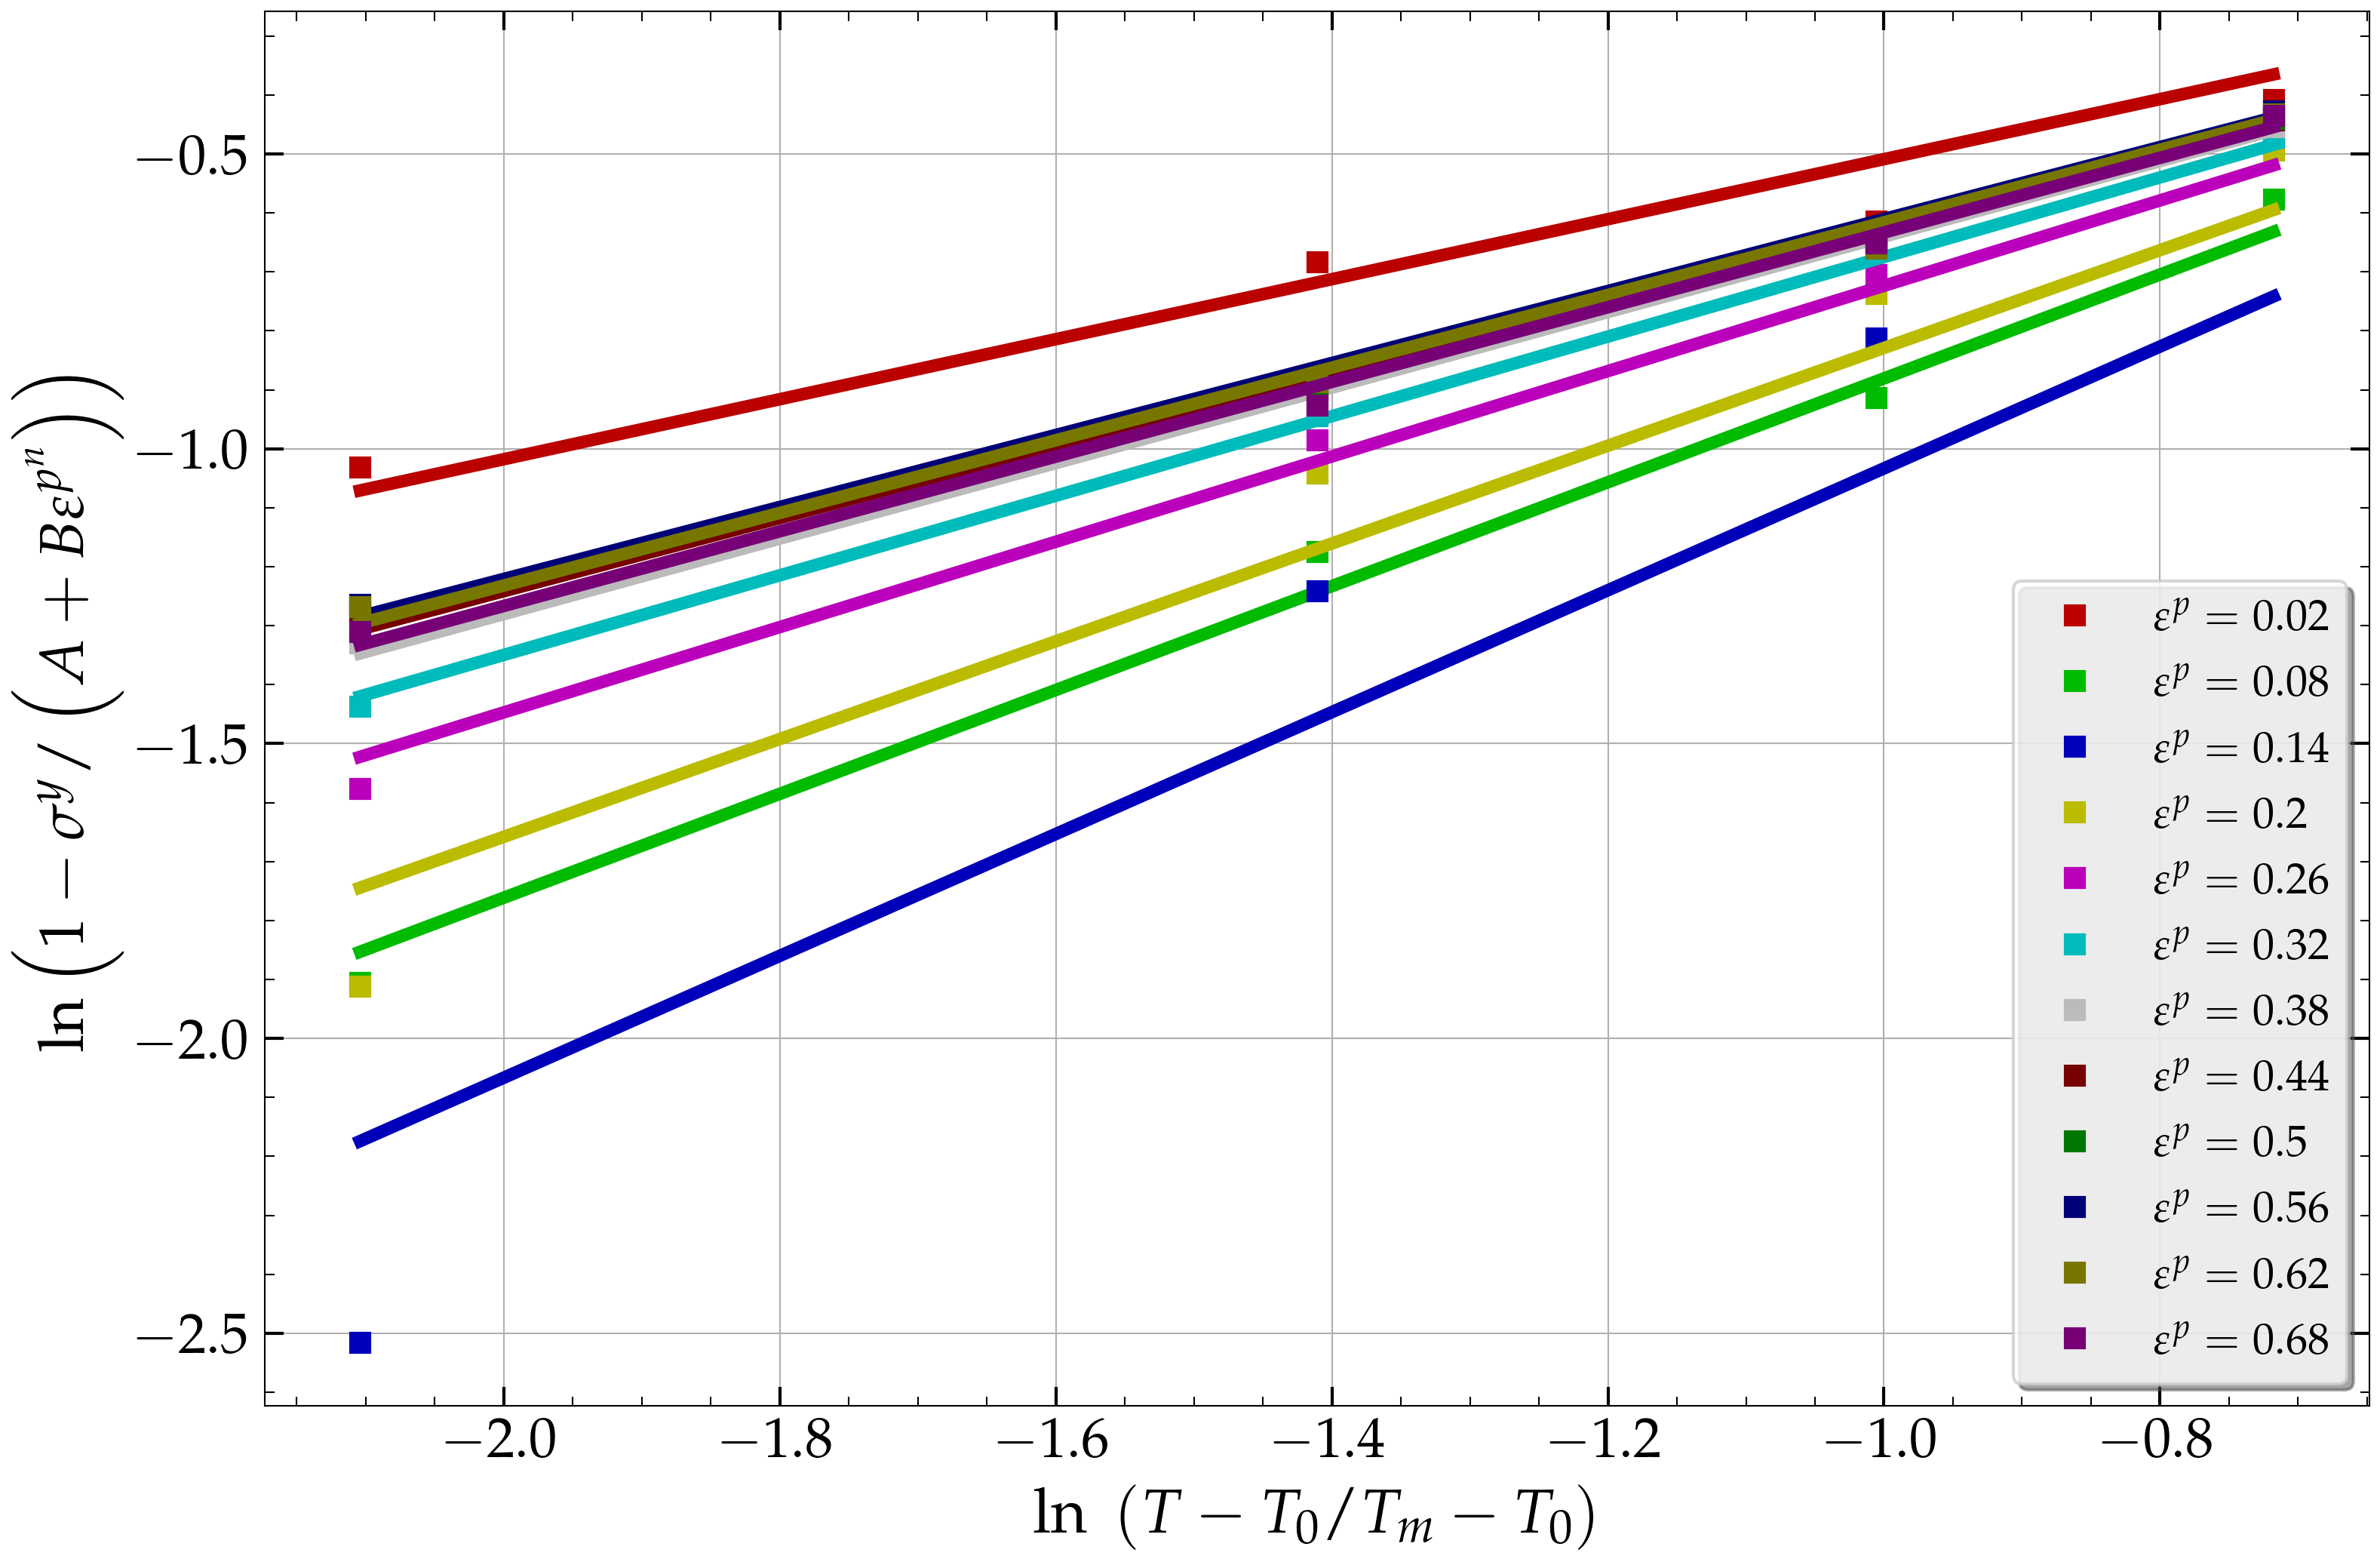

In [16]:
plt.figure(figsize =(12,8))
plt.rc('text', usetex = True)
J1 = []
cl=0
for epsj in list(strains[::3]):
    sbdata = sigEpsp0[sigEpsp0[:,0]==epsj]
    #print(sbdata)
    popt, pcov = curve_fit(specialFunction, np.log((sbdata[:,2]-T0)/(Tm-T0)), np.log(sbdata[:,3]), bounds=(-np.inf, [np.inf]))
    m1 = popt
    J1.append(m1)
    plt.plot(np.log((sbdata[:,2]-T0)/(Tm-T0)),  np.log(sbdata[:,3]), colors[cl], label = r'$\varepsilon^p='+str(epsj)+ '$', marker='s', linestyle='None')
    plt.plot(np.log((sbdata[:,2]-T0)/(Tm-T0)), specialFunction(np.log((sbdata[:,2]-T0)/(Tm-T0)), m1), colors[cl], lw=4)
    plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
    plt.xlabel(r'$\ln\ \left(T - T_0 / T_m - T_0\right)$', fontsize = 20)
    plt.ylabel(r'$\ln\left(1 - \sigma^y/\left(A + B\varepsilon^{p^n}\right)\right)$', fontsize = 20)
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    cl +=1
m  = np.mean(J1)
print("m=%g" %(m))
plt.savefig('SigmaT.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show() 

In [17]:
A,B,C,n,m

(14.87954,
 20.51901848213266,
 0.351886781353673,
 0.08342853364938438,
 0.6988578208947165)

In [18]:
def JCconstitutiveLaw(eps, epsp, T):
    return (A + B * eps**n) * (1 + C * np.log(epsp / epsp0)) * (1 - ((T - T0) / (Tm - T0))**m)

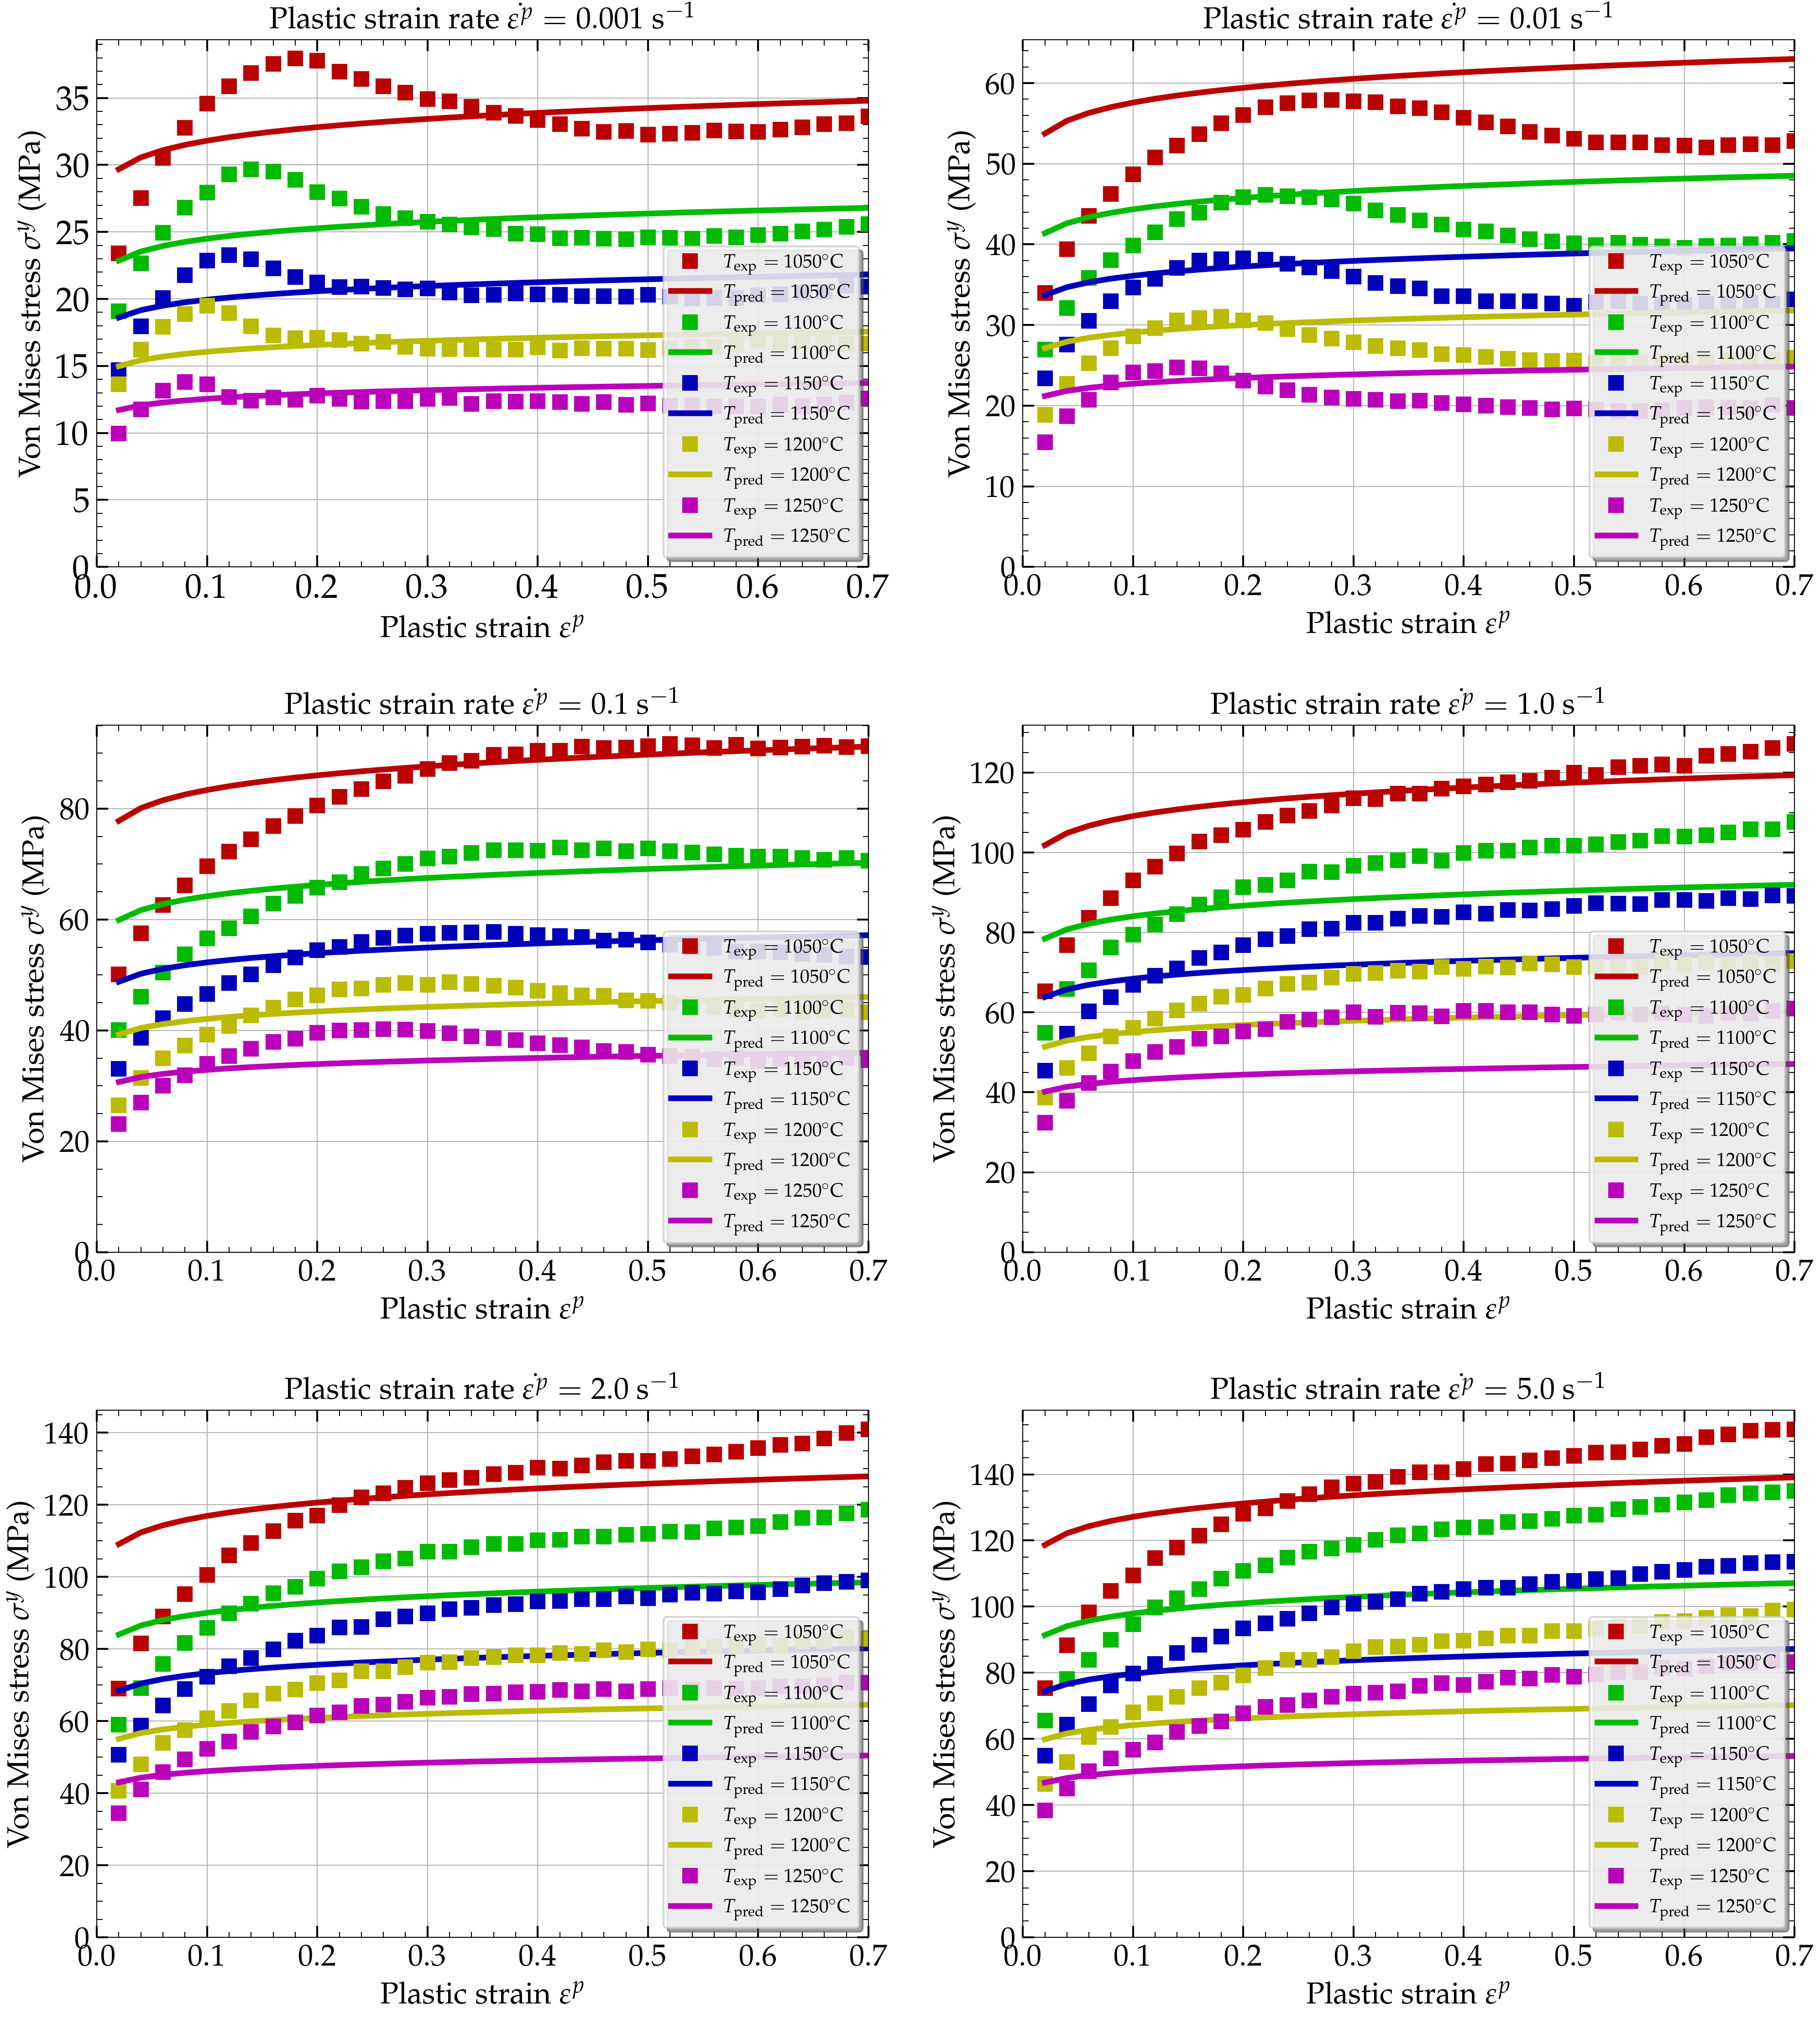

In [19]:
# Plot the curves
plt.figure(figsize = sbPlotSize(nEpsp))
plt.rc('text', usetex = True)
idx = 1
plt.subplots_adjust(hspace = 0.3)
for epsp in list(epsps):
    xs, ys = sbPlot(nEpsp)
    plt.subplot(xs, ys, idx)
    sbdata = shortData[shortData[:,1]==epsp]
    cl =0
    for temp in list(temperatures):
        sbdata1 = sbdata[sbdata[:,2]==temp]
        plt.plot(sbdata1[:,0], sbdata1[:,3], colors[cl], label = r'$T_{\text{exp}} =\ $' + str(int(temp)) + r'$^{\circ}$C',  marker='s', markersize=7,linestyle = 'none')
        plt.plot(strains, JCconstitutiveLaw(strains, epsp, temp), colors[cl], label = r'$T_{\text{pred}} =\ $' + str(int(temp)) + r'$^{\circ}$C', linewidth = 3)
        plt.rcParams['xtick.labelsize'] = 16
        plt.rcParams['ytick.labelsize'] = 16
        cl +=1
    plt.legend(loc = 'lower right', fancybox = True, numpoints = 1, fontsize = 10)
    #plt.grid() # Plot the grid with default size
    plt.xlim(0, 0.7)
    plt.ylim(bottom=0)
    plt.xlabel(r'Plastic strain $\varepsilon^p$', fontsize = 16) # Labels the x axis
    plt.ylabel(r'Von Mises stress $\sigma^y$ (MPa)', fontsize = 16) # Labels the y axis
    plt.title(r'Plastic strain rate $\dot{\varepsilon^p} = ' + str(epsp) + '$ s$^{-1}$', fontsize = 16) # Self explicit command
    idx += 1
#plt.savefig("CompExpJC.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.savefig("CompExpJC.svg", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [20]:
JCstress = JCconstitutiveLaw(shortData[:,0], shortData[:,1], shortData[:,2])

In [21]:
EAAR = np.sum(np.abs((shortData[:,3] - JCstress)/(shortData[:,3])))*100/JCstress.shape[0]
print("EAAR = %g" %(EAAR) + ' %')

EAAR = 12.6334 %


In [22]:
RMSE = np.sqrt(np.sum((shortData[:,3] - JCstress)**2)/JCstress.shape[0])
print('RMSE = %g' %(RMSE)+' MPa')

RMSE = 11.128 MPa
